# Curso de Manejo de Datos Faltantes: Detecciòn y Exploraciòn

## Configuraciòn de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanior matplotlib missingno numpy pandas pyreadr seaborn session-info upsetplot

or

pip install -r requirements.txt
```

## Importar librerìas

In [91]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot


## Importar funciones personalizadas

In [92]:
%run pandas-missing-extension.ipynb

## Operar con valores faltantes

### Python

In [93]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    #None + None,
    #None / None,
    type(None),
    sep="\n",
)

True
False
True
True
<class 'NoneType'>


### NumPy

In [94]:
print(
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    type(np.nan),
    np.isnan(np.nan),
    sep="\n",
)

nan
False
True
nan
<class 'float'>
True


### Pandas

In [95]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [96]:
test_missing_df.isna()


,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [97]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [98]:
test_missing_df.x.isnull()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [99]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [100]:
pd.Series([pd.to_datetime("2022-01-01"), np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [101]:
pd.Series([-1]).isnull()

0    False
dtype: bool

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [102]:
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [103]:
!wget -O ../data/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

In [104]:
diabetes_df = pd.read_csv(
    "../data/pima-indians-diabetes.csv", # or pima_indians_diabetes_url
    sep=",",
    names=[
            "pregnancies",
            "glucose",
            "blood_pressure",
            "skin_thickness",
            "insulin",
            "bmi",
            "diabetes_pedigree_function",
            "age",
            "outcome",
        ],
)

diabetes_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de informaciòn de los conjuntos de datos

In [105]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Descargar y cargar los conjuntos de datos

In [106]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"../data/{ dataset_file }"
    dataset_url = f"{ base_url }{dataset_file}"

    !wget -q -O  { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

### Incluir conjunto de datos en nuestro ambiente local

In [107]:
locals().update(**datasets_dfs)
del datasets_dfs

### Verificar carga de conjunto de datos

In [108]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

## Tabulaciòn de valores faltantes

In [109]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


## Resùmenes bàsicos de valores faltantes

In [110]:
riskfactors_df.shape

(245, 34)

#### Nùmero total de valores completos (sin observaciones faltantes)

In [111]:
riskfactors_df.missing.number_complete()

7144

#### Nùmero total de valores faltantes

In [112]:
riskfactors_df.missing.number_missing()

1186

## Resùmenes bàsicos de valores faltantes

### Variables / columnas

#### Resumen por variable

In [113]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


#### Tabulaciòn del resumen por variable

In [114]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


#### Casos / Observaciones / Filas

In [115]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


##### Tabulaciòn del resumen por caso

In [116]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


### Intervalos de valores faltantes

In [117]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### Run length de valores faltantes

In [118]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)


,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualizaciòn inicial de valores faltantes

#### Variable

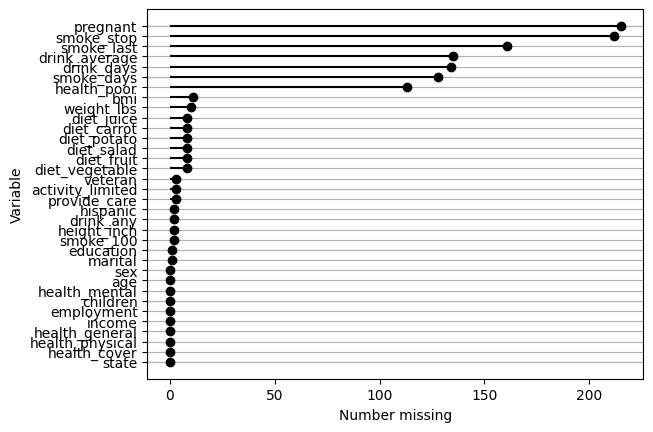

In [119]:
riskfactors_df.missing.missing_variable_plot()

#### Case / Observaciòn / fila

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


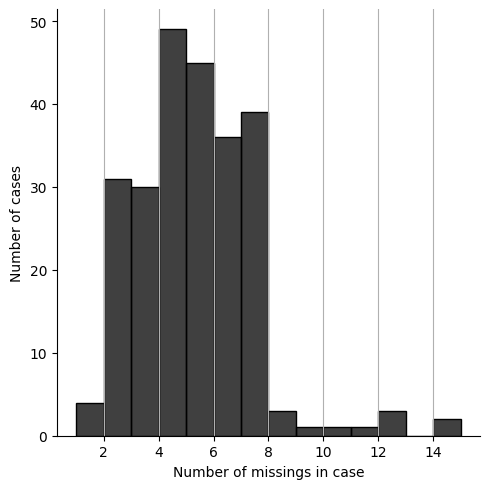

In [120]:
riskfactors_df.missing.missing_case_plot()

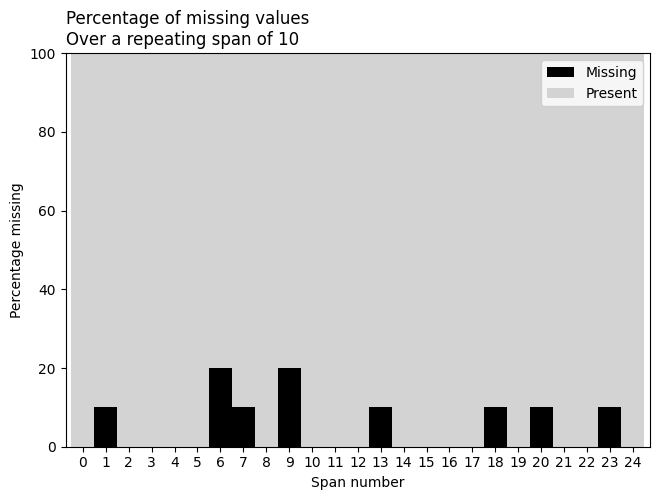

In [121]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",
        span_every=10,
        rot = 0
    )
)

<AxesSubplot:>

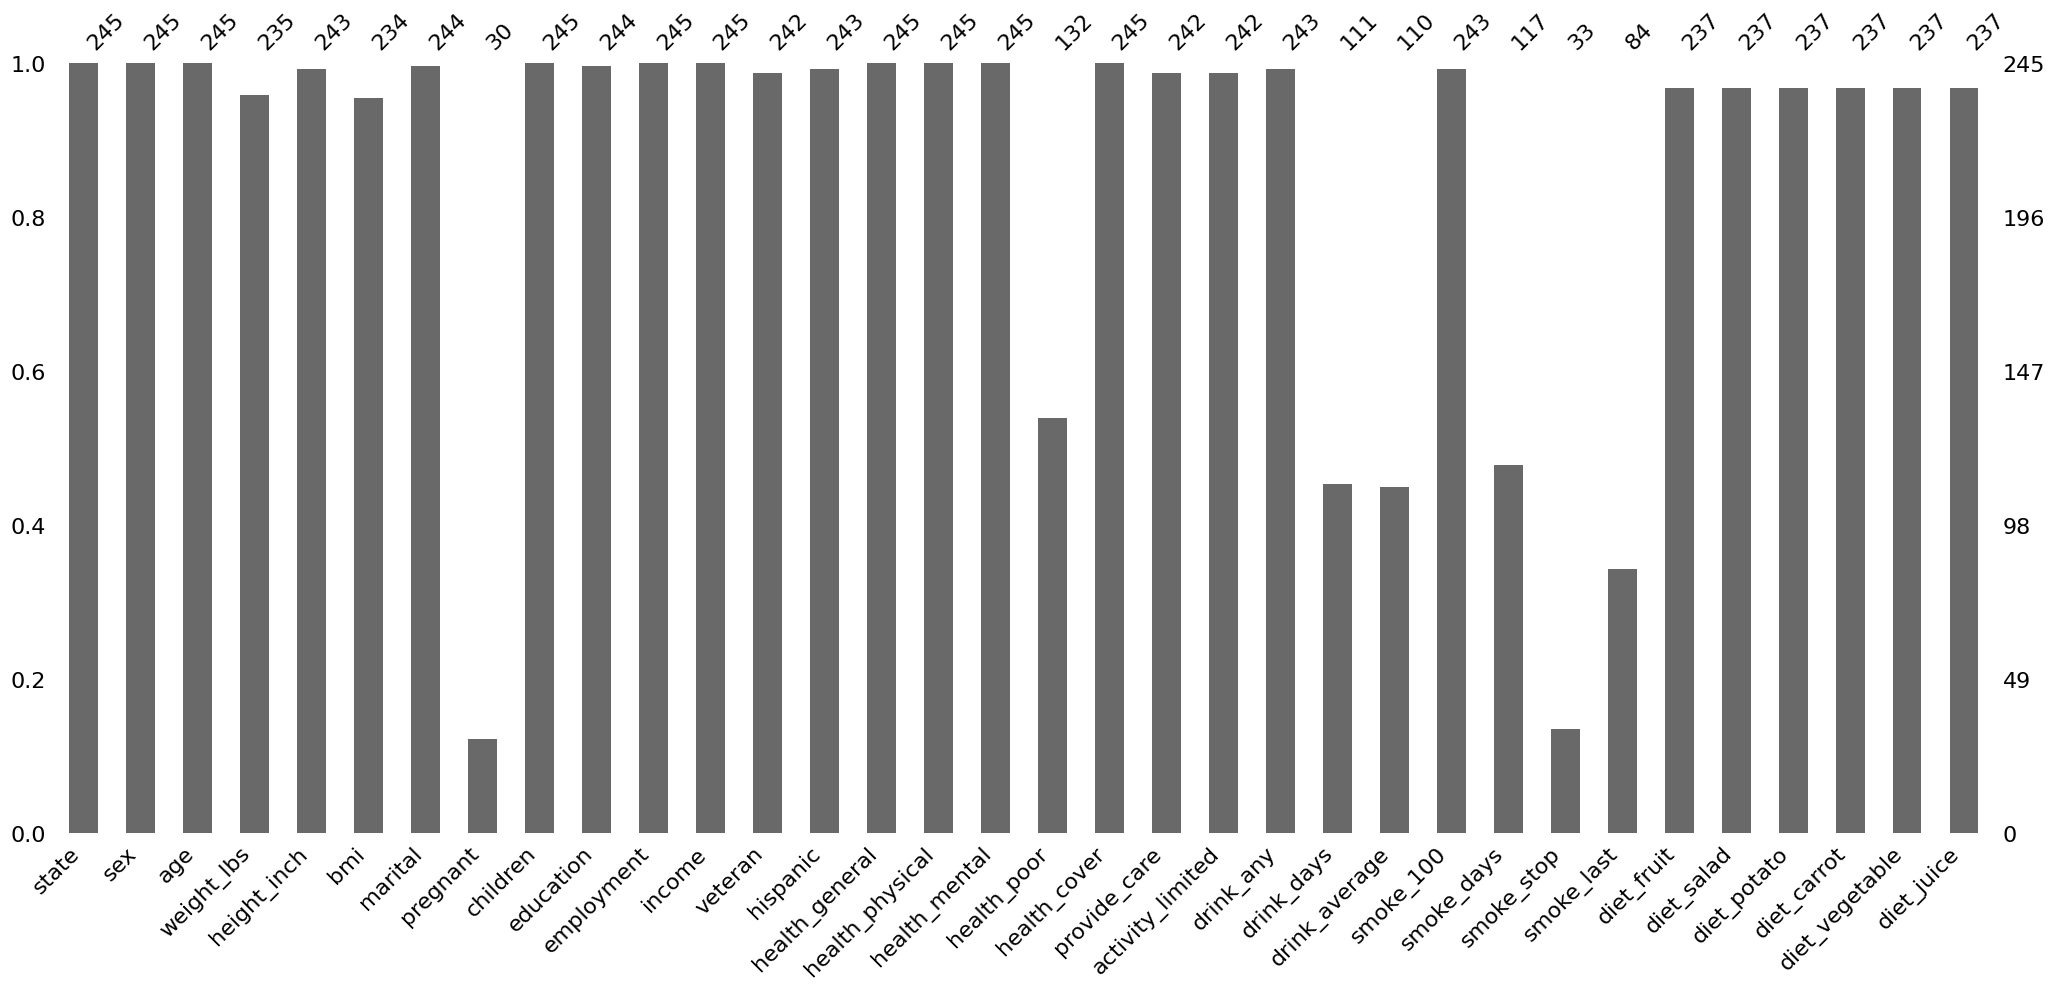

In [122]:
missingno.bar(df = riskfactors_df)

<AxesSubplot:>

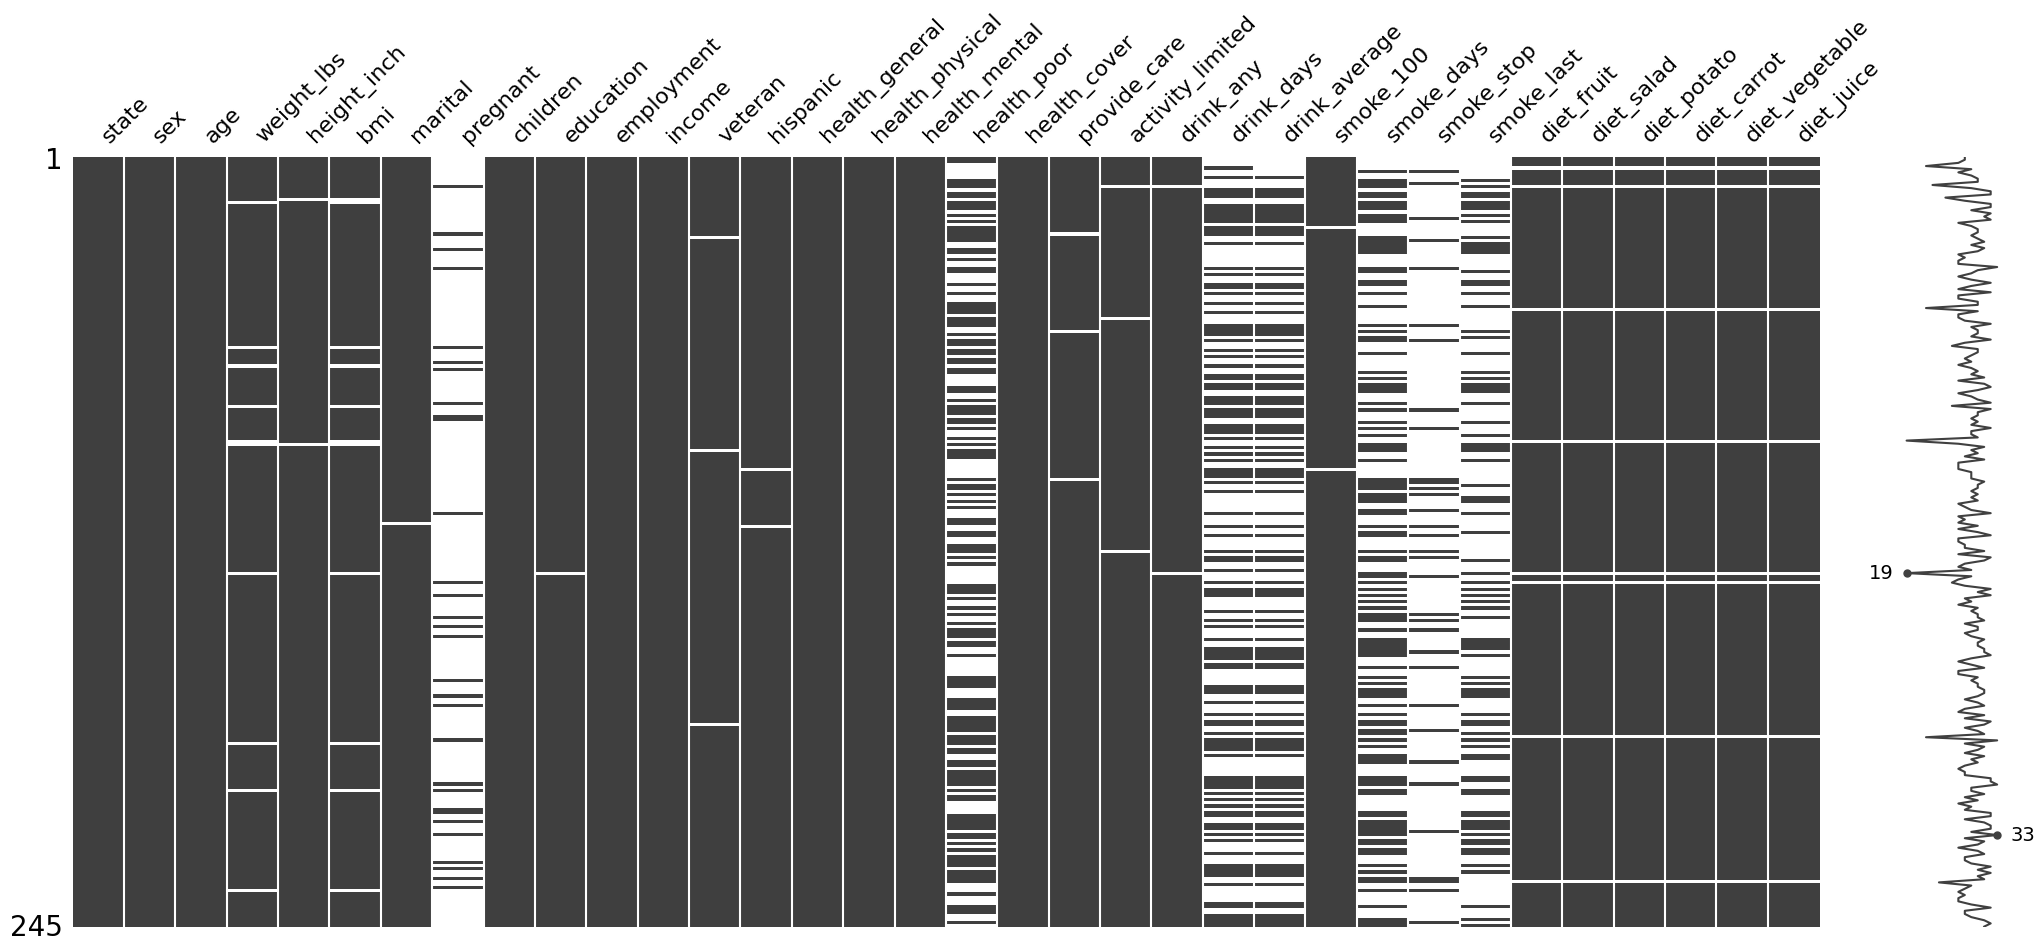

In [123]:
missingno.matrix(df = riskfactors_df)

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/upsetplot/plotting.py:783: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['#0000002e' 'black' '#0000002e' ... '#0000002e' '#0000002e' '#0000002e']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/upsetplot/plotting.py:784: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'solid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["linestyle"].fillna("solid", inplace=True)


{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

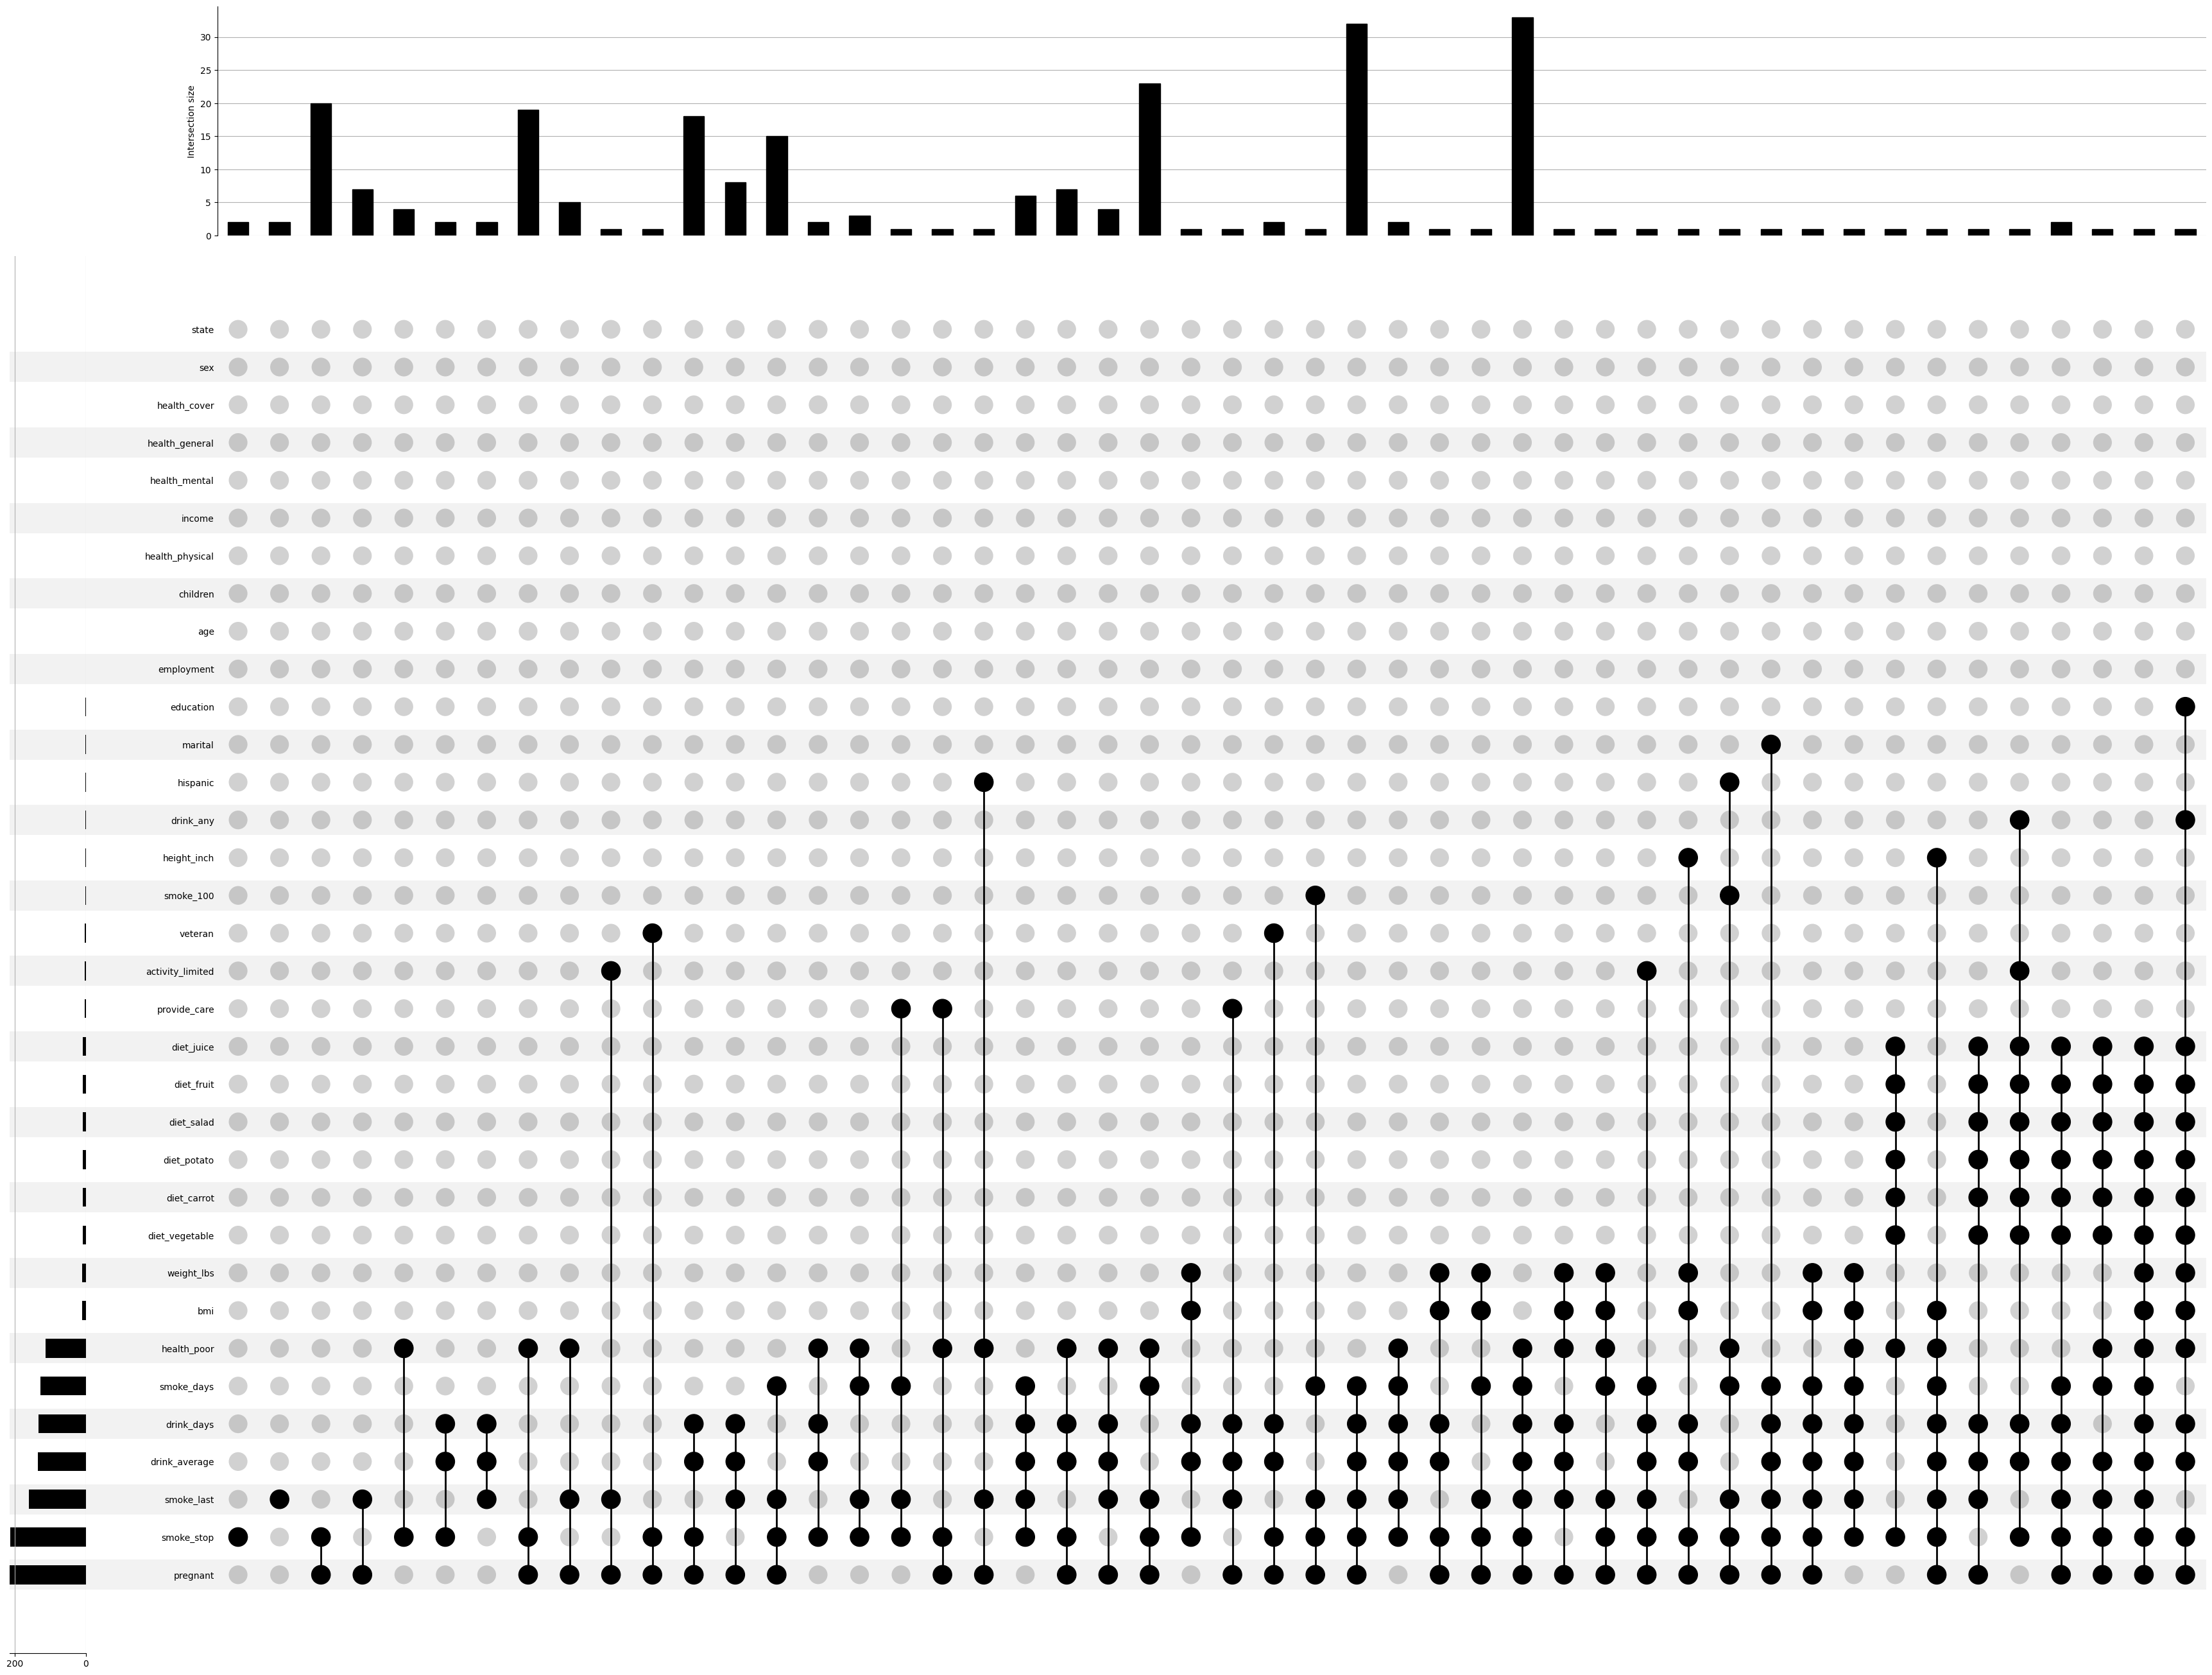

In [124]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=None,
        element_size = 60
    )
)

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/upsetplot/plotting.py:783: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e' '#0000002e'
 '#0000002e' 'black' '#0000002e' 'black' 'black' '#0000002e' 'black'
 '#0000002e' 'black' '#0000002e' 'black' 'black' 'black' 'black' 'black']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/upsetplot/plotting.py:784: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'solid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["linestyle"].fillna("solid", inplace=True)


{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

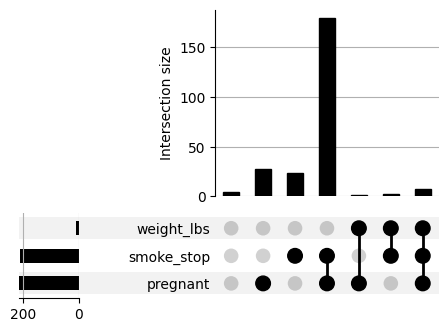

In [125]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=["pregnant", "weight_lbs", "smoke_stop"],
        element_size = 30
    )
)

## Codificaciòn de valores faltnates

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comùnmente asociados a valores faltantes

#### Cadenas de texto

In [126]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Nùmeros

In [127]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Còmo encontrar los valores comùnmente asociados a valores faltantes?

In [128]:
#creamos un df (diccionario) de ejemplo
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [129]:
missing_data_example_df.missing.number_missing() #revisamos con funciòn si el df tiene datos faltantes, pero el resultado no es real

0

#### Revisar tipos de datos

In [130]:
missing_data_example_df.dtypes #reisamos que tipos de datos son las columnas/variables del df

x    object
y    object
z     int64
dtype: object

#### Revisar valores ùnicos de los datos por columna

In [131]:
missing_data_example_df.x.unique() #revisamos valores ùnicos de la columna x del df

array([1, 3, 'NA', -99, -98], dtype=object)

In [132]:
(  
    missing_data_example_df 
    .select_dtypes(object) #seleccione los datos de las columnas tipo objeto
    .apply(pd.unique) #muestre los datos ùnicos
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comùnmente asociados a valores faltantes

##### Sustituciòn desde la lectura de datos

In [133]:
pd.read_csv( #vamos a leer archivo tipo csv
    "../data/missing_data_encoding_example.csv", #path del archivo csv a leer
    na_filter=True, #filtramos los valores que sean datos faltanes o nulos
    na_values=[-99, -1] #reemplazamos los valores filtrados que sean igual a -99, -1 por nan
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


##### Sustituciòn global

In [134]:
missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [135]:
#Sustituiremos datos faltantes en el df
(
    missing_data_example_df
    .replace(
        to_replace=[-99, "NA"], #reemplazamos datos faltantes -99, "NA"
        value=np.nan #reemplazamos con nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


##### Sustituciòn dirigida

In [136]:
#Sustituiremos datos faltantes en una columna especìfica
(
    missing_data_example_df
    .replace(               #reemplazamos...
        to_replace= {
            "x": {          #en columna/variable x...
                -99: np.nan #los datos faltantes con valor -99, por nan
            }
        }          
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


## Conversiòn de valores implìcitos a explìcitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [137]:
#creamos conjunto de datos df de prueba ejemplo
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name":["lynn", "lynn", "lynn", "zelda"],
        "time":["morning", "afternoon", "night", "morning"],
        "value":[350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


### Estrategias para la identificaciòn de valores faltantes implìcitos

##### Pivotar la tabla de datos

In [138]:
#Vamos a pivotar, alargar una tabla, teniendo una variable como referencia y agregamos rellenando los valores
(
    implicit_to_explicit_df
    .pivot_wider(       #alargamos tabla 
        index="name",   #variable name la preservamos como identificadores de cada fila
        names_from="time",   #preguntamos de donde vienen los nombres
        values_from="value" #valores a rellenar en la calumna value
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


##### Cuantificar ocurrencias de n-tuplas (Otra manera)

In [139]:
#cuantificamos cuantas veces aparecen valores de variable name
(
    implicit_to_explicit_df
    .value_counts(      #contar...
        subset=["name"] #cuantas veces aparecen cada valor de la variable/columna name
    )
)

name 
lynn     3
zelda    1
Name: count, dtype: int64

In [140]:
#cuantificamos cuantas veces aparecen valores de variable name...
#y 
(
    implicit_to_explicit_df
    .value_counts(          #contar...
        subset=["name"]     #cuantas veces aparecen caad valor de la variable/columna name
    )
    .reset_index(name="n")  #en la tabla que se crea, cambiamos nombre de la columna por "n" 
    .query("n < 3")         #consultamos  de la variable/columna "n" que valores aparecen menos de tres veces
)

,name,n
1,zelda,1


## Exponer filas faltantes implìcitas en explìcitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

##### Ejemplo, encontrar los pares faltantes de name y time

In [141]:
#visualizamos df ejemplo
(
    implicit_to_explicit_df
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


In [142]:
(
    implicit_to_explicit_df
    #janitor
    .complete(      #completamos tabla...
        "name",     #dejando referencia de filas variable name...
        "time"      #con valores de la columna time
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar la exposiciòn de n-tuplas de valores faltantes

In [143]:
(
    implicit_to_explicit_df
    .complete(      #completamos tabla...
        {"name": ["lynn", "zelda"]},    #dejando como referencia de filas solo variable name = lynn zelda...
        {"time": ["morning", "afternoon"]}, ##solor con valores de la columna time = morning, afternoon
        sort = True  #ordena los valores, primero los pasados y despuès el resto 
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


#### Rellenar los valore faltantes

In [144]:
(
    implicit_to_explicit_df
    .complete(   #completamos tabla...
        "name",     #dejando referencia de filas variable name...
        "time",      #con valores de la columna time
        fill_value=np.nan   #llenamos valores con nan
    )
)

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/janitor/functions/complete.py:244: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df = df.fillna(fill_value, downcast="infer")


,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar el rellenado de valores faltantes implìcitos

In [145]:
(
    implicit_to_explicit_df
    .complete(      #completamos tabla...
        "name",     #dejando referencia de filas variable name...
        "time",      #con valores de la columna time
        fill_value=0,   #rellenamos con 0 los datos faltantes
        explicit=False  #No modificar datos faltantes o nulos ya existentes
    )
)

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/janitor/functions/complete.py:270: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(df[column_name]):


,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


## Tipos de valores faltantes

In [146]:
diabetes_df     #revisamos df diabetes

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


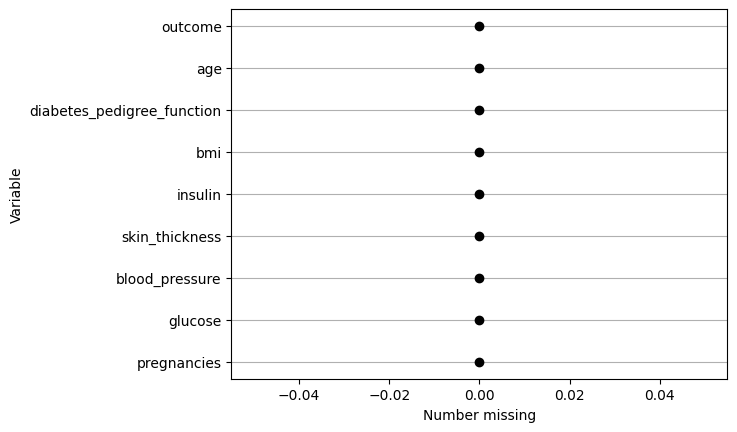

In [147]:
#visualizamos cantidad de datos faltantes missing del df...
#aunque no muestre missing (datos faltantes), en realidad si los tiene
diabetes_df.missing.missing_variable_plot()

In [148]:
#revisamos las primeras 6 columnas del df donde estàn los datos faltantes
diabetes_df[diabetes_df.columns[1:6]]

,glucose,blood_pressure,skin_thickness,insulin,bmi
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


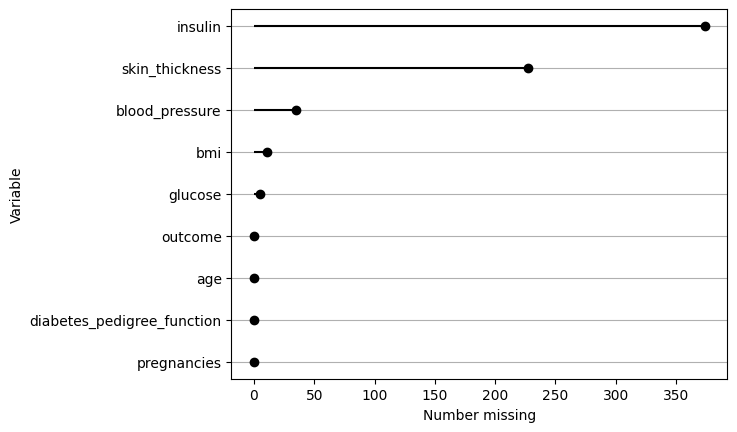

In [149]:
#reemplazamos en el df los missings de las primeras 6 columnas por nan
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
#visualizamos el df con los reemplazos
diabetes_df.missing.missing_variable_plot()


#### Missing Completely At Random (CAR)

<AxesSubplot:>

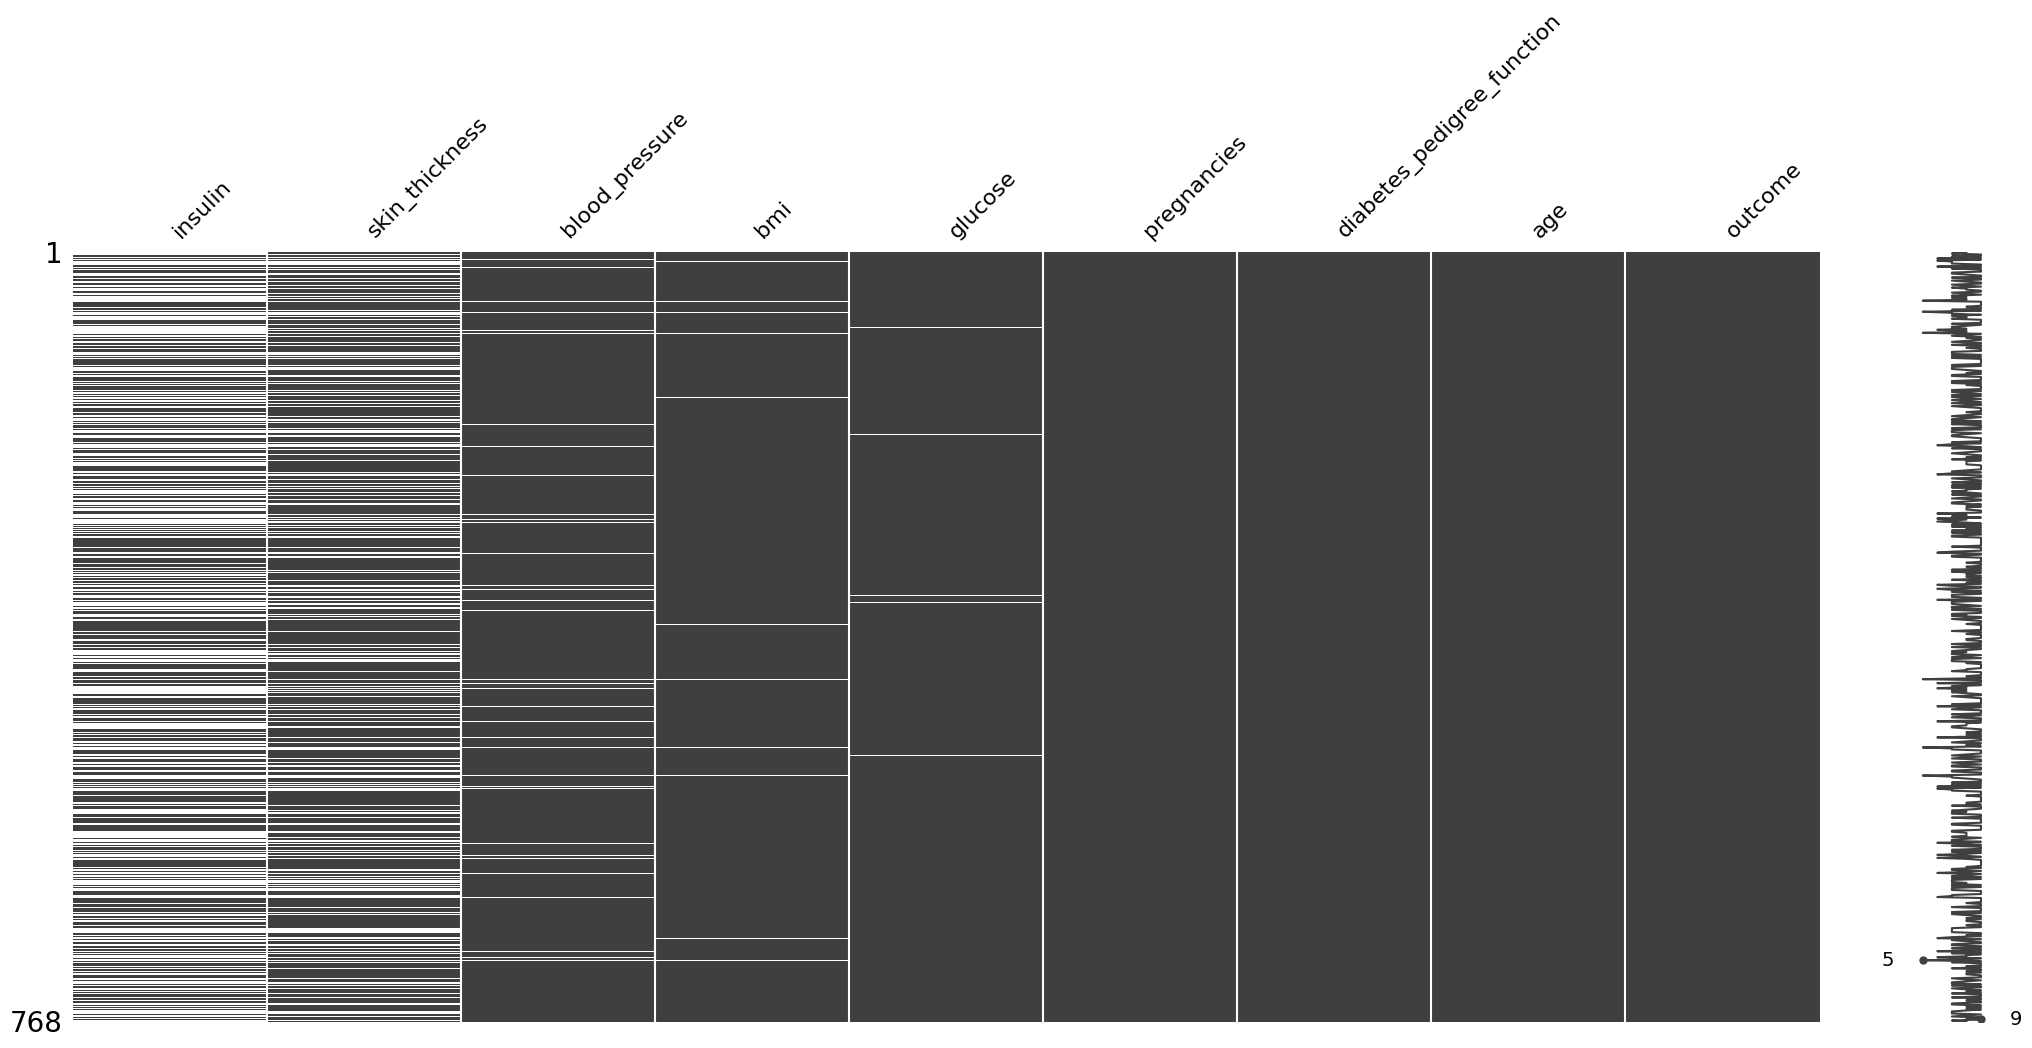

In [150]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()    #ordenar en df las columnas por cantidad de datos faltantes (missing)
    .pipe(missingno.matrix)     #visualizamos en gràfico  matrix el df con las columnas ordenadas por cantidad de missing
)

#### Missing At Random (MAR)

<AxesSubplot:>

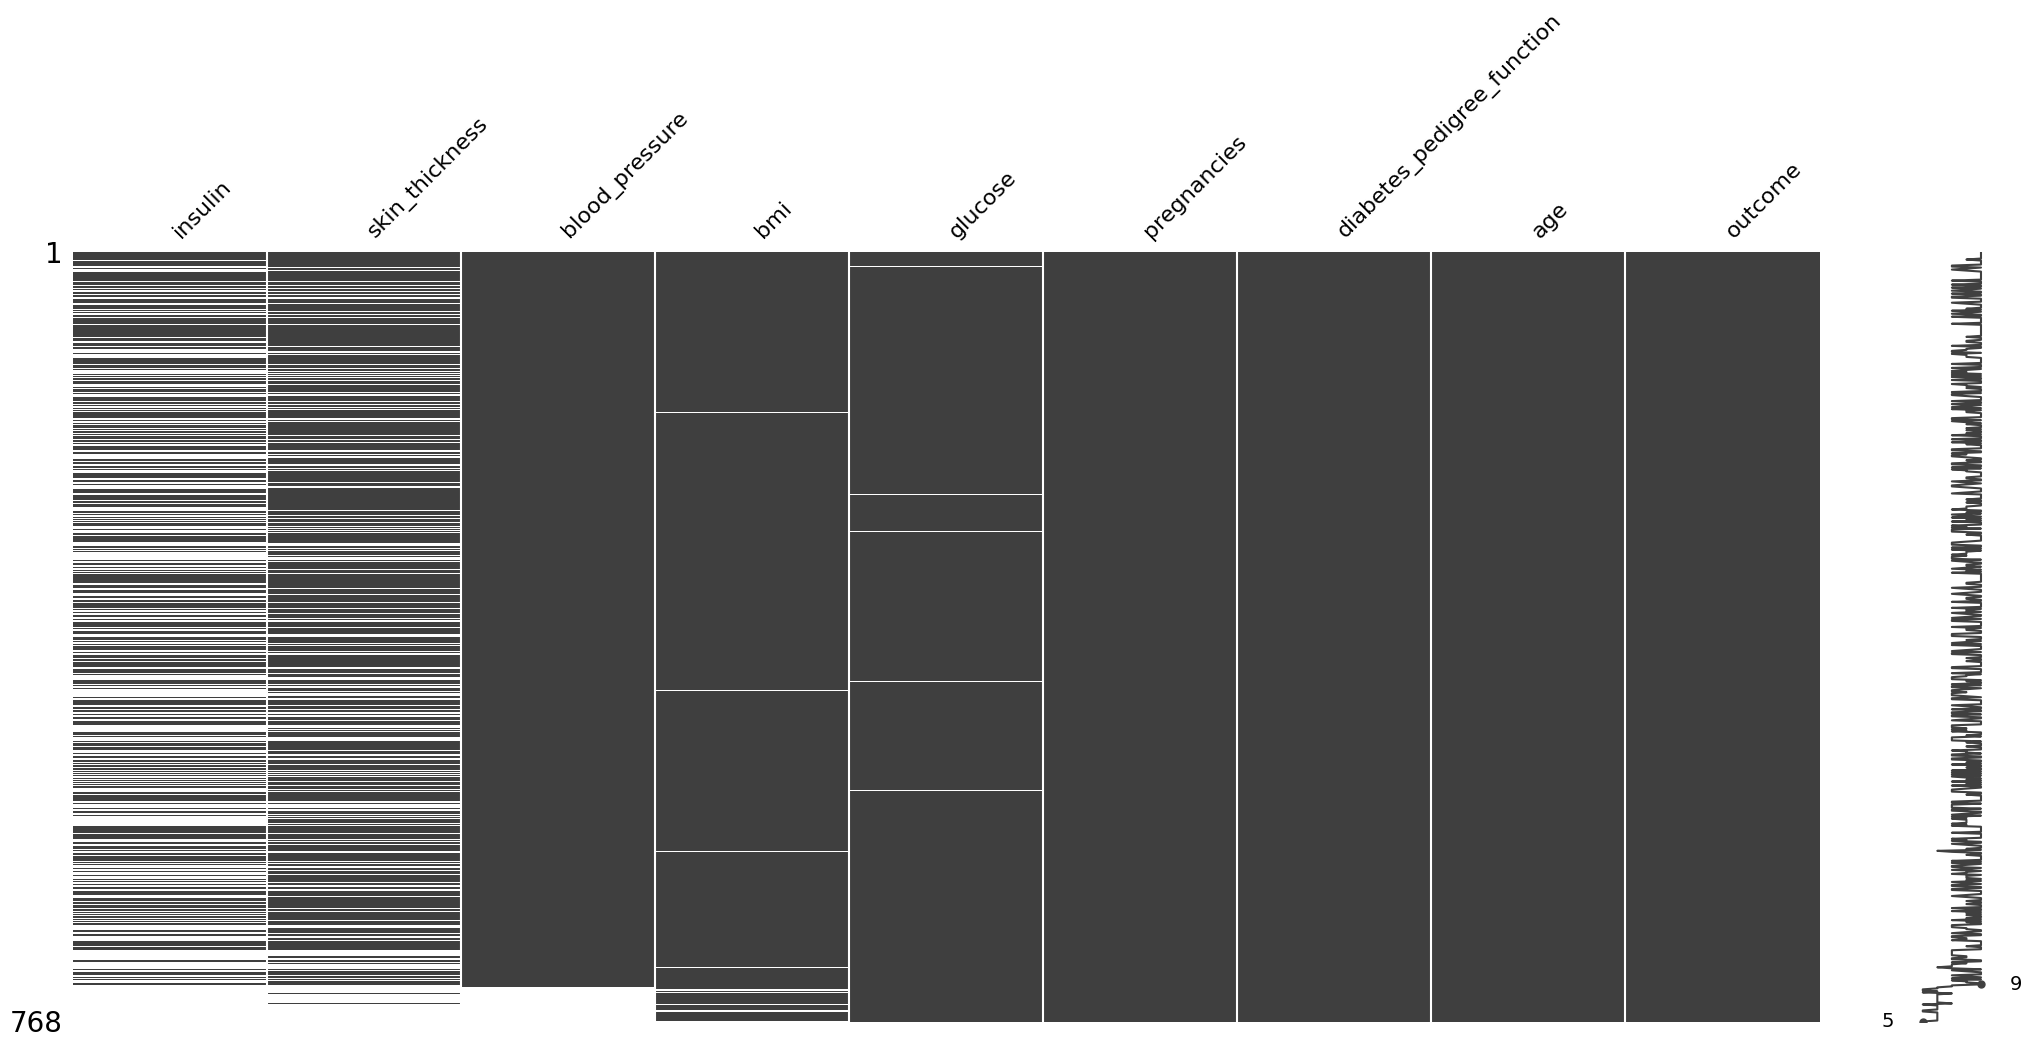

In [151]:
(
    diabetes_df
    .missing.sort_variables_by_missingness() #ordenar en df las columnas por cantidad de datos faltantes (missing)
    .sort_values(by = "blood_pressure") #ordenamos por los valores de columna blood_plessure 
    .pipe(missingno.matrix) #visualizamos en matriz
)

#### Missing Not At Random (MNAR)

<AxesSubplot:>

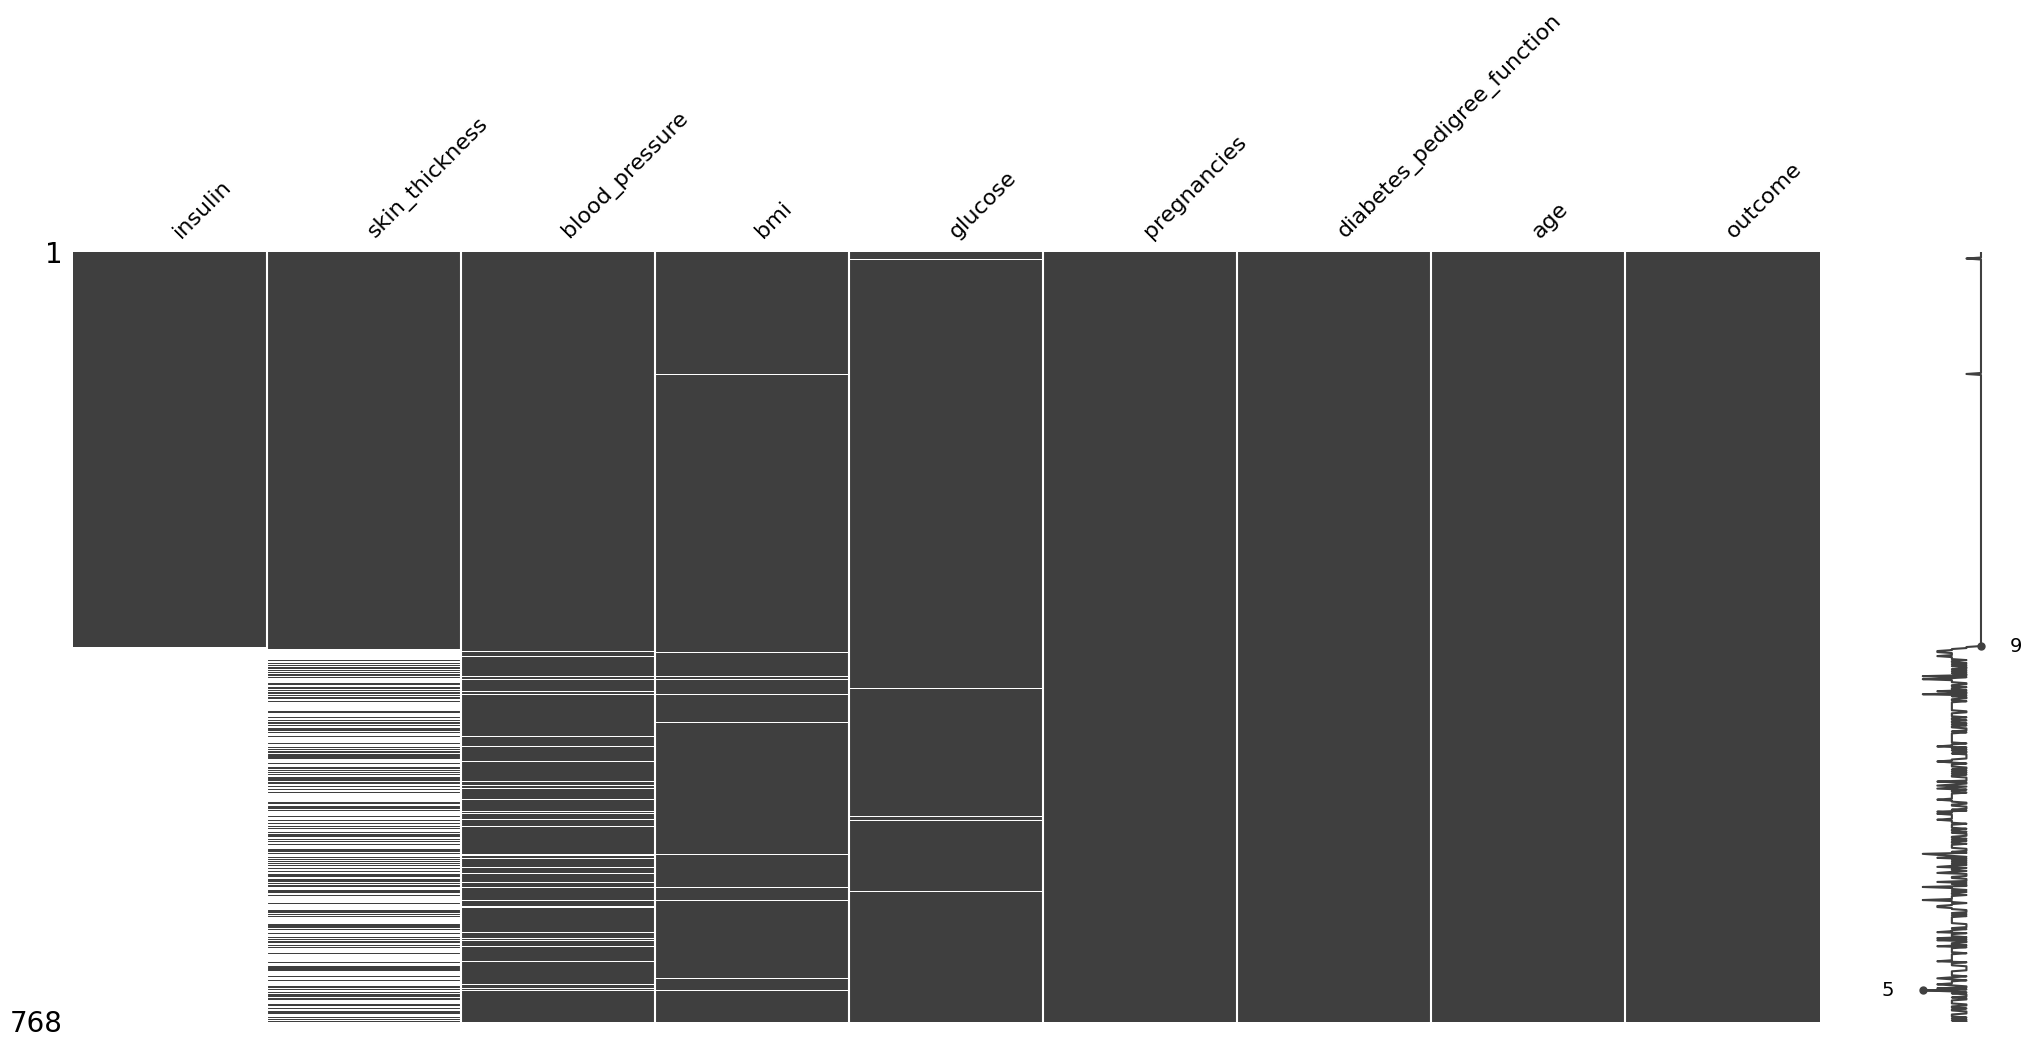

In [152]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()#ordenar en df las columnas por cantidad de datos faltantes (missing)
    .sort_values(by = "insulin")    #ordenamos por los valores de columna blood_plessure 
    .pipe(missingno.matrix) #visualizamos en matriz
)

## Concepto y aplicación de la matriz de sombras (i.e., shadow matrix)

#### Construcciòn de la matriz de sombras

In [153]:
(
    riskfactors_df  #revisamos df
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


In [154]:
#reemplazamos en df datos completos por False y datos faltantes por True
(
    riskfactors_df
    .isna()
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [155]:
(
    riskfactors_df
    .isna()     #reemplazamos en df datos completos por False y datos faltantes por True
    .replace({  #reemplazamos en df datos False por Not_missing y True por Missing
        False: "Not missing",
        True: "Missing"
    })
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


In [156]:
(
    riskfactors_df
    .isna()     #reemplazamos en df datos completos por False y datos faltantes por True
    .replace({  #reemplazamos en df datos False por Not_missing y True por Missing
        False: "Not missing",
        True: "Missing"
    })
    .add_suffix("_NA")  #reemplazamaos emcabezados de columnas/variables agregàndoles _NA
)

,state_NA,sex_NA,age_NA,weight_lbs_NA,height_inch_NA,bmi_NA,marital_NA,pregnant_NA,children_NA,education_NA,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


In [157]:
(
    riskfactors_df
    .isna()     #reemplazamos en df datos completos por False y datos faltantes por True
    .replace({  #reemplazamos en df datos False por Not_missing y True por Missing
        False: "Not missing",
        True: "Missing"
    })
    .add_suffix("_NA")  #reemplazamaos emcabezados de columnas/variables agregàndoles _NA
    .pipe(
        lambda shadow_matrix: pd.concat(    #concatenamos por columnas, riskfactor_df con tabla Missing - Not_missing
            [riskfactors_df, shadow_matrix],
            axis="columns"
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


#### Utilizar funciòn de utilerìa bind_shadow_matrix()

In [158]:
#automatizamos proceso anterior de generar matriz sombra
(
    riskfactors_df
    .missing
    .bind_shadow_matrix()
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [159]:
#automatizamos proceso  de generar matriz sombra
#pero solo con columnas/variables que tienen datos faltantes
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)  #sòlo con columnas con datos faltantes
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


#### Explorar estadìsticos utilizando las nuevas columnas de la matriz de sombras

In [160]:
#automatizamos proceso  de generar matriz sombra
#pero solo con columnas/variables que tienen datos faltantes
#miraremos si existe algua diferencia de alguna variable frente a la ausencia de otra
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)  #sòlo con columnas con datos faltantes
    .groupby(["weight_lbs_NA"]) #agrupamos por variagle weight, para mirar en caso de su ausencia o no
    ["age"] #diferencia de la variable age
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


## visualizaciòn de valores faltantes en una variable

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated an

<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

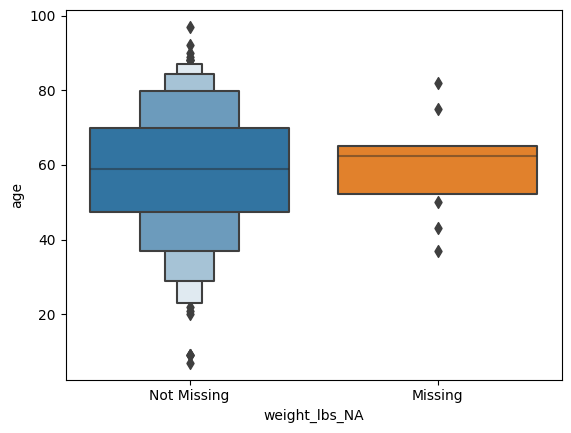

In [161]:
#automatizamos proceso  de generar matriz sombra
#pero solo con columnas/variables que tienen datos faltantes
#miraremos si existe algua diferencia de alguna variable frente a la ausencia de otra
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)  #sòlo con columnas con datos faltantes
    .pipe(
        lambda df: (    #funciòn para graficar... pasamos el conjunto de datos creado(matriz sombra)
            sns.boxenplot(  #mediante seaborn un gràfico boxplot...
                data=df,    #nuestro pasamos nuestro conjunto de datos
                x="weight_lbs_NA",  #(eje x) dependiendo de si el variable peso està disponible o no
                y="age" #(eje y) la variable sobre la que queremos observar su distribuciòn
            )
        )
    )
)

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

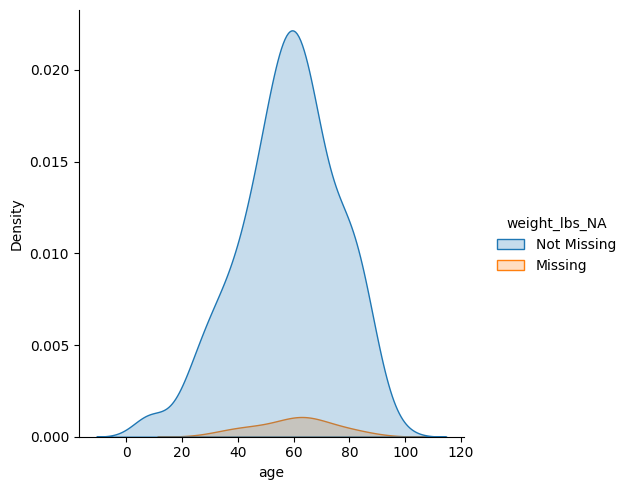

In [162]:
#mediante fràfica de densidad revisamos los sesgos o presencias en algunos casos
#visualizamos datos por medio de las distribuciones de otra manera
#automatizamos proceso  de generar matriz sombra
#pero solo con columnas/variables que tienen datos faltantes
#miraremos si existe algua diferencia de alguna variable frente a la ausencia de otra
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)  #sòlo con columnas con datos faltantes
    .pipe(
        lambda df: (    #funciòn para graficar... pasamos el conjunto de datos creado(matriz sombra)
            sns.displot(  #mediante seaborn un gràfico displot...
                data=df,    #nuestro pasamos nuestro conjunto de datos
                x="age",  #(eje x) lo que queremos graficar en distribuciòn
                hue="weight_lbs_NA", #pintamos cada lìnea depeniendo de si exste o no variable
                kind="kde",
                fill=True
            )
        )
    )
)

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

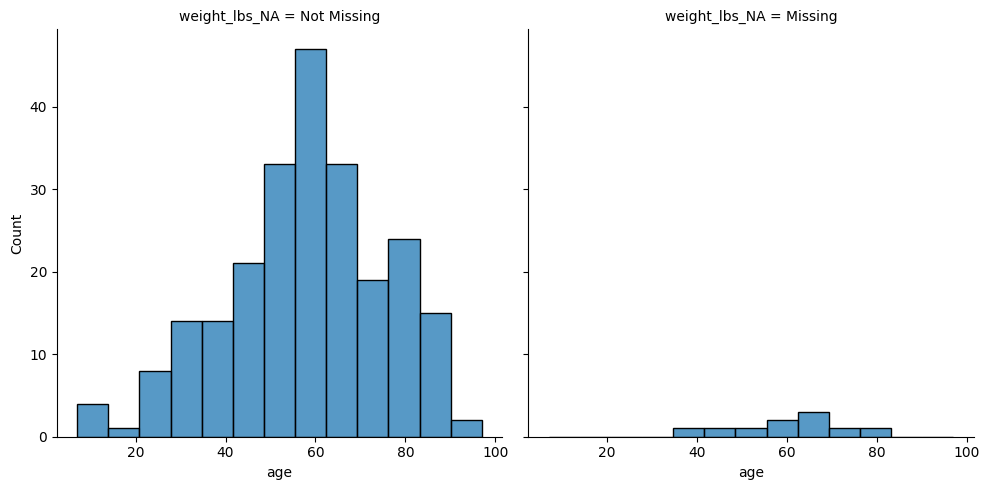

In [163]:
#mediante fràfica de dos columnas revisamos los sesgos o presencias en algunos casos
#visualizamos datos por medio de las distribuciones de otra manera
#automatizamos proceso  de generar matriz sombra
#pero solo con columnas/variables que tienen datos faltantes
#miraremos si existe algua diferencia de alguna variable frente a la ausencia de otra
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)  #sòlo con columnas con datos faltantes
    .pipe(
        lambda df: (    #funciòn para graficar... pasamos el conjunto de datos creado(matriz sombra)
            sns.displot(  #mediante seaborn un gràfico displot...
                data=df,    #nuestro pasamos nuestro conjunto de datos
                x="age",  #(eje x) lo que queremos graficar en distribuciòn
                col="weight_lbs_NA"
            )
        )
    )
)

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

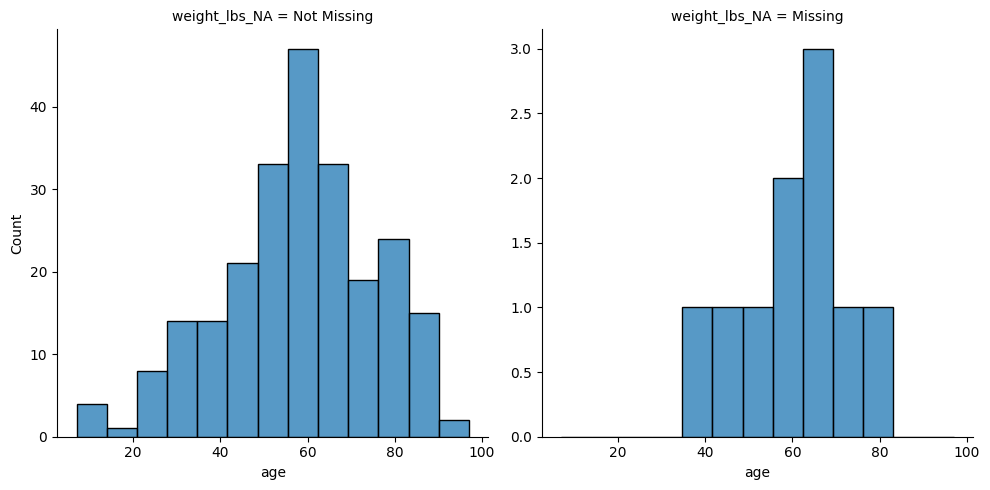

In [164]:
#mediante fràfica de dos columnas revisamos los sesgos o presencias en algunos casos
#visualizamos datos por medio de las distribuciones de otra manera
#automatizamos proceso  de generar matriz sombra
#pero solo con columnas/variables que tienen datos faltantes
#miraremos si existe algua diferencia de alguna variable frente a la ausencia de otra
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)  #sòlo con columnas con datos faltantes
    .pipe(
        lambda df: (    #funciòn para graficar... pasamos el conjunto de datos creado(matriz sombra)
            sns.displot(  #mediante seaborn un gràfico displot...
                data=df,    #nuestro pasamos nuestro conjunto de datos
                x="age",  #(eje x) lo que queremos graficar en distribuciòn
                col="weight_lbs_NA",
                facet_kws= {
                    "sharey": False
                }
            )
        )
    )
)

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

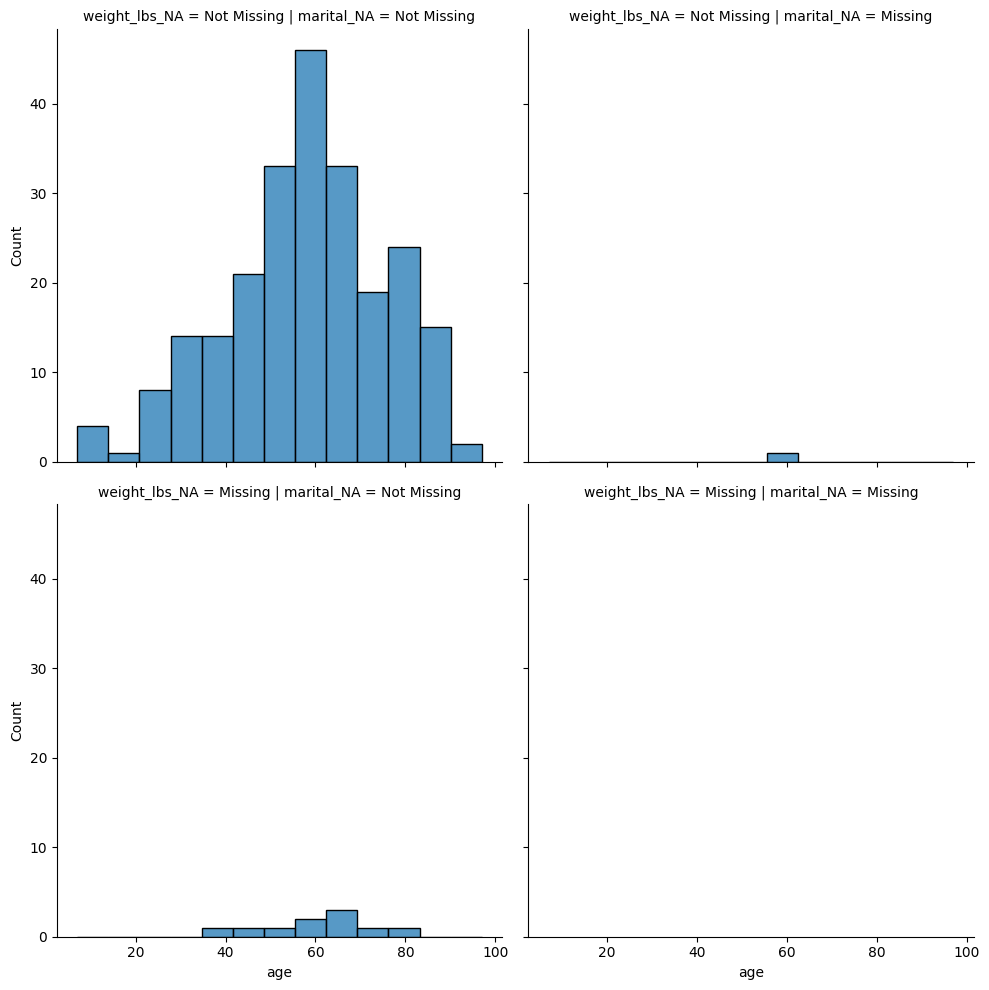

In [165]:
#mediante fràfica de  columnas revisamos los sesgos o presencias en algunos casos
#visualizamos datos por medio de las distribuciones de otra manera
#automatizamos proceso  de generar matriz sombra
#pero solo con columnas/variables que tienen datos faltantes
#miraremos si existe algua diferencia de alguna variable frente a la ausencia de otra
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)  #sòlo con columnas con datos faltantes
    .pipe(
        lambda df: (    #funciòn para graficar... pasamos el conjunto de datos creado(matriz sombra)
            sns.displot(  #mediante seaborn un gràfico displot...
                data=df,    #nuestro pasamos nuestro conjunto de datos
                x="age",  #(eje x) lo que queremos graficar en distribuciòn
                col="marital_NA",   #agregamos otra variable para mirar diferencia con el peso
                row="weight_lbs_NA"
            )
        )
    )
)

## Visualizaciòn de valores faltantes en dos variables

In [166]:
#creamos funciòn para agregar valor dummie a valores faltantes
def column_fill_with_dummies(
        column: pd.Series,      #paràmetrol column (serie)
        proportion_below: float=0.10, #nùmero o porcentaje en el cual queremos graficar nuestros datos (puntos rojos en la gràfica debajo del rango de valores reales)
        jitter: float=0.075,    #ayuda visualizar datos en caso de asolapamientos en ciertas mediciones con mismos valores
        seed: int=42,           #como introducimos componente aleatorio añadimos una semilla
) -> pd.Series:                 #nuestra funciòn regresa una serie
    
    column = column.copy(deep=True) #copiamos valores de column para evitar modificar datos reales

    # Extract values metadata (extraemos los valores, sus metadatos)

    missing_mask = column.isna()                #definimos màscara que nos diga si hay un valor faltante missing
    number_missing_values = missing_mask.sum()  #calculamos la cantidad de nùmeros faltantes missing
    column_range = column.max() - column.min()    #calculamos el rango de nuestra variable, para graficar devajo de este rango para no sobrelape

    # hacemos un shift a nuestros datos...
    #de tal forma que pasemos todos nuestros datos devajo de su valor orirignal
    #con la proporciòn que nosotros definimos
    column_shift = column.min() - column.min() * proportion_below

    #creamos ruido, crate the jitter (noise) to be added around the points.
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data.
    column[missing_mask] = column_shift + column_jitter    #los valores ue realmente queremos sobreescribir son los que tenemos observacoines o datos faltantes 

    return column


#### Visualizamos en un scatterplot

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

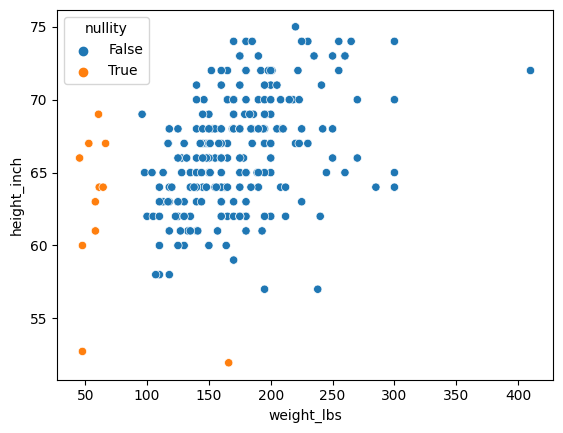

In [167]:
#del df seleccionamos solamente las columnas con missing (datos faltantes)
(
    riskfactors_df      #leemos nuestro df
    .select_dtypes(     #seleccionamos todo el df excepto las variables/columnas tipo categorìa...
        exclude="category"  #es decir escluimos las variables que no son numèricas
    )
    .pipe(      #seleccionamos solamente las columnas que tienen missing (datos faltantes)
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string = True, false_string = False)  #creamos matriz sombra
    .apply( #al leer una columna y tenga _NA regresa su nombre, sino tiene _NA se rellenan don valores dummies los missing
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter = 0.075)
    )
    .assign(    #creamos nueva columna con valores, si se tiene observaciones de una variable y la otra no.
        nullity = lambda df : df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(      #graficamos en scatterplot color azul las dos variables tienen observaciones, color naranja solo una variable tiene observacion
        lambda df : (
            sns.scatterplot(
                data = df,
                x="weight_lbs",
                y="height_inch",
                hue="nullity"
            )
        )
    )
)

#### Reto meter funcion column_fill_with_dummies y visualizar scatterplot 
#### dentro de archivo pandas-missing-extension.ipynb

/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jam/anaconda3/envs/datos_faltantes/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

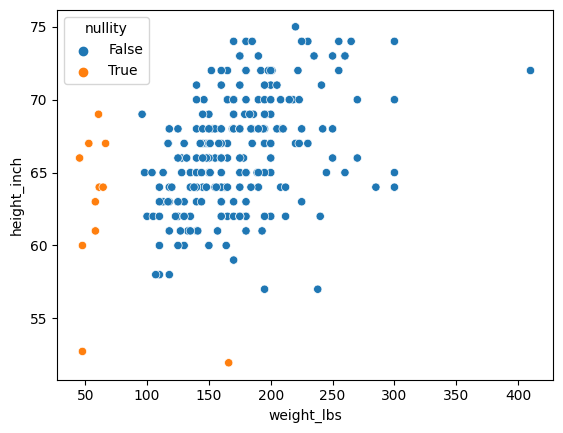

In [171]:
(
    riskfactors_df
    .missing
    .scatter_plot_missing_nullity_two_var("weight_lbs", "height_inch")
)
